In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
trainds = pd.read_csv(r'C:\Users\533974\Desktop\Kaggle\House Prices Advanced Regression Techniques\train.csv')
trainds.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [29]:
trainds.dtypes.head()

Id                int64
MSSubClass        int64
MSZoning       category
LotFrontage     float64
LotArea           int64
dtype: object

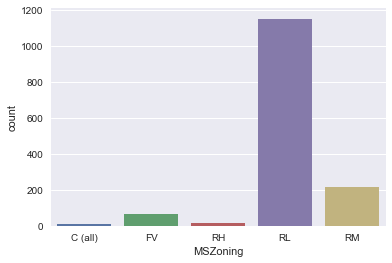

In [25]:
trainds.MSZoning = trainds.MSZoning.astype('category')
sns.countplot(x = 'MSZoning', data = trainds)

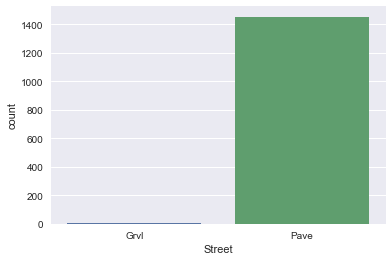

In [28]:
trainds.Street = trainds.Street.astype('category')
sns.countplot(x = 'Street', data = trainds)

In [41]:
trainds.drop('Alley', axis = 1, inplace = True)

In [42]:
trainds.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

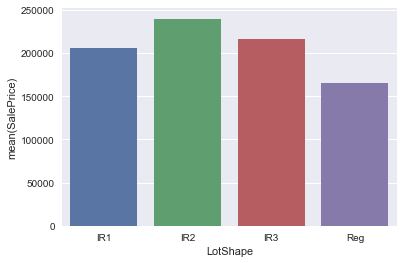

In [60]:
sns.barplot(x = 'LotShape', y = 'SalePrice', data = trainds.groupby(by='LotShape').mean().reset_index())

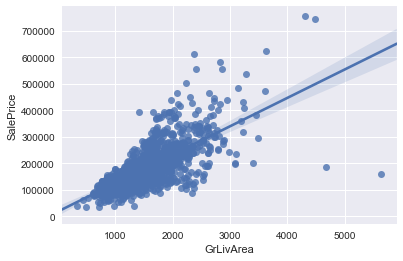

In [70]:
sns.regplot(x = 'GrLivArea', y = 'SalePrice', data = trainds)

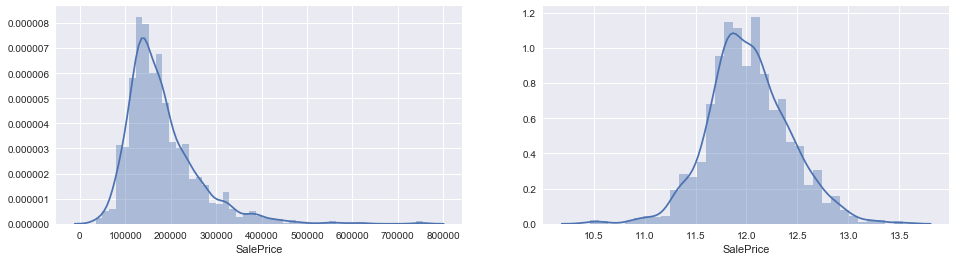

In [100]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(16,4))
sns.distplot(trainds['SalePrice'], ax=axis1)
sns.distplot(np.log(trainds['SalePrice']), ax = axis2)

In [102]:
print('Skewness: {}'.format(trainds['SalePrice'].skew()))
print('Kurtosis: {}'.format(trainds['SalePrice'].kurt()), end='\n\n')

print('log(Skewness): {}'.format(3.2*np.log(trainds['SalePrice']).skew()))
print('log(Kurtosis): {}'.format(3.2*np.log(trainds['SalePrice']).kurt()))

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529

log(Skewness): 0.388272199056653
log(Kurtosis): 2.5905023865716146


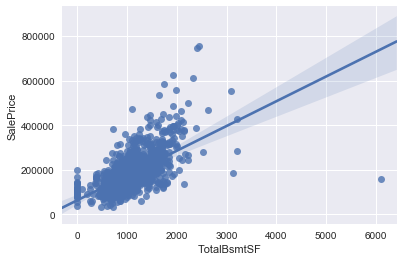

In [77]:
sns.regplot(x = 'TotalBsmtSF', y = 'SalePrice', data = trainds)

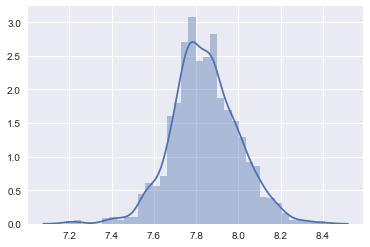

In [121]:
from scipy.stats import boxcox
sns.distplot(boxcox(trainds['SalePrice'])[0])

In [125]:
boxcox(trainds['SalePrice'])[0]

array([ 7.93260838,  7.87826129,  7.95961595, ...,  8.02737969,
        7.78100381,  7.79588503])

In [126]:
trainds['newSalePrice'] = boxcox(trainds['SalePrice'])[0]

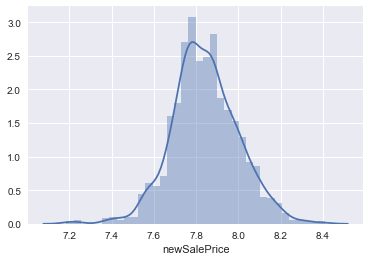

In [127]:
sns.distplot(trainds['newSalePrice'])

In [129]:
print('Skewness : {}'.format(trainds['newSalePrice'].skew()))
print('Kurtosis : {}'.format(trainds['newSalePrice'].kurt()))

Skewness : -0.00865297992364803
Kurtosis : 0.8778702738892878


### Relationship with categorical features

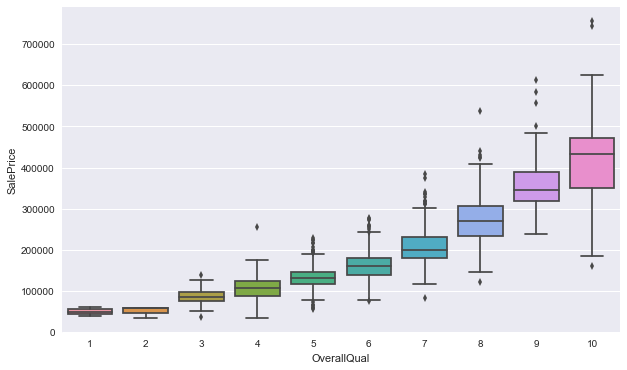

In [133]:
f, axis = plt.subplots(figsize = (10,6))
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = trainds, ax = axis)

In [151]:
trainds.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

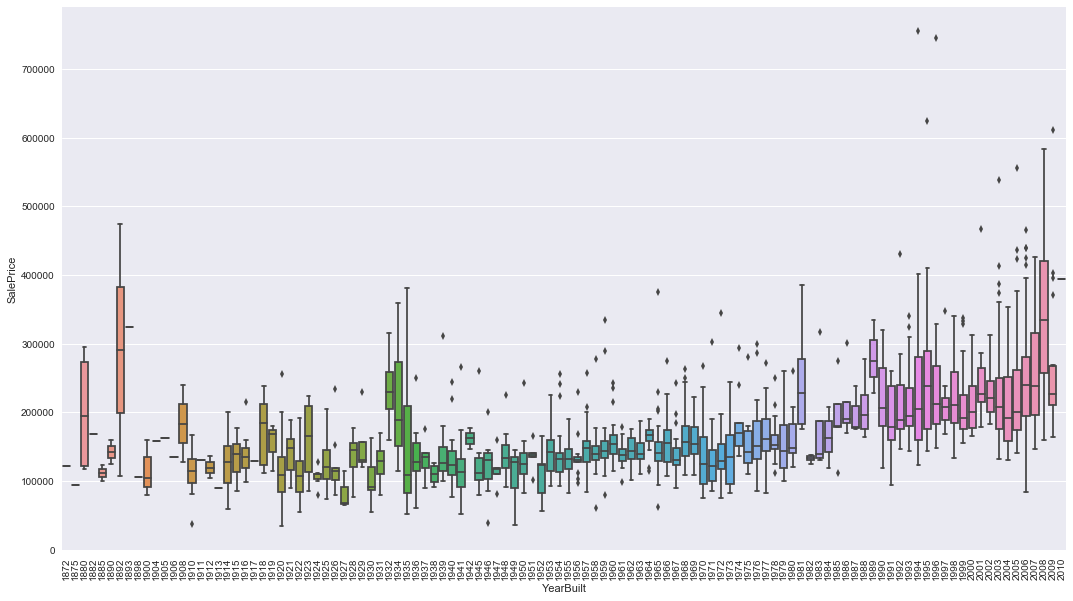

In [160]:
f,axis = plt.subplots(figsize = (18,10))
sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = trainds, ax = axis)
plt.xticks(rotation = 90);

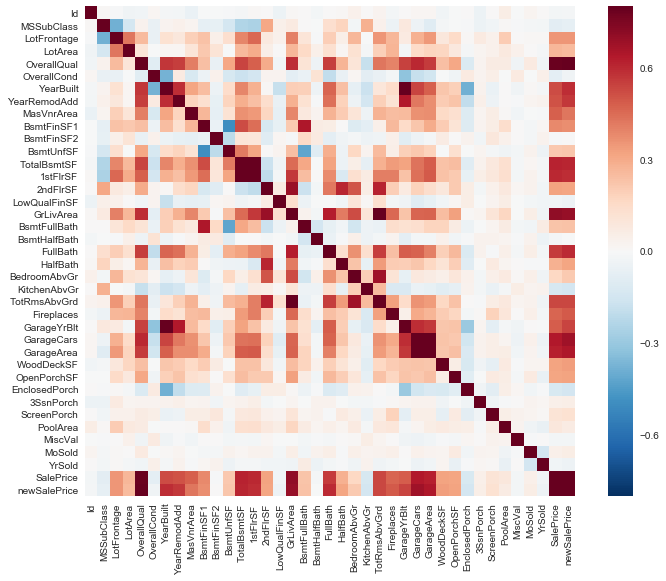

In [185]:
corrmat = trainds.corr()
f,axis = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat,vmax = 0.8, square = True, )

In [177]:
corrmat.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'newSalePrice'],
      dtype='object')

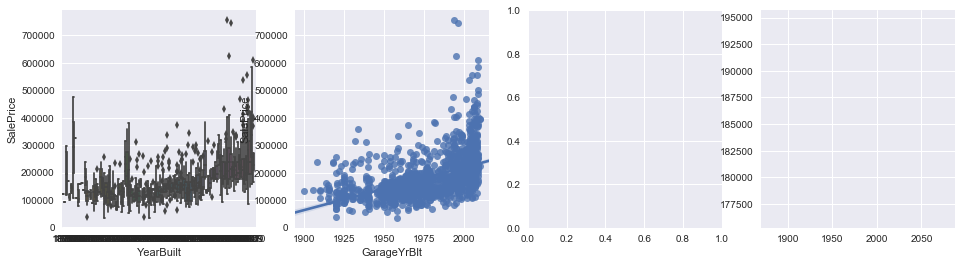

In [205]:
f, (axis1, axis2, axis3, axis4) = plt.subplots(1,4, figsize = (16,4))
#f, (axis1) = plt.subplots(figsize = (10,8))
sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = trainds, ax = axis1)
sns.regplot(x = 'GarageYrBlt', y = 'SalePrice', data = trainds, ax = axis2)

In [204]:
trainds.TotalBsmtSF.corr(trainds.GrLivArea)

0.454868202547903

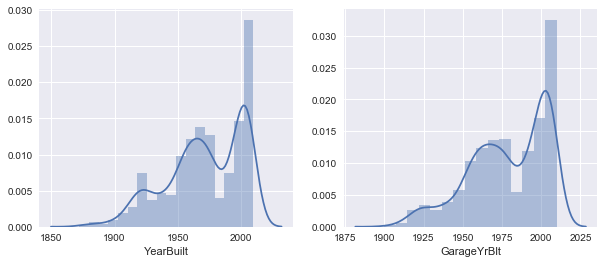

In [213]:
f, (axis1, axis2) = plt.subplots(1,2, figsize = (10,4))
sns.distplot(trainds.YearBuilt, ax = axis1)
sns.distplot(trainds.GarageYrBlt.dropna(), ax = axis2)

In [223]:
mCorrmat = corrmat[corrmat > 0.75]
mCorrmat.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'newSalePrice'],
      dtype='object')

In [232]:
mCorrmat['1stFlrSF'][mCorrmat['1stFlrSF'] > 0]

TotalBsmtSF    0.81953
1stFlrSF       1.00000
Name: 1stFlrSF, dtype: float64

In [260]:
cols = corrmat.nlargest(10, 'SalePrice', keep = 'first').SalePrice.index
cols

Index(['SalePrice', 'newSalePrice', 'OverallQual', 'GrLivArea', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd'],
      dtype='object')

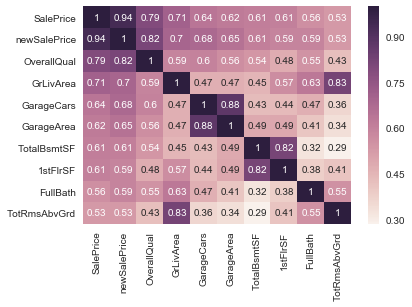

In [274]:
cols = corrmat.nlargest(10, 'SalePrice', keep = 'first').SalePrice.index
cm = np.corrcoef(trainds[cols].values.T)
sns.heatmap(cm, annot = True, xticklabels=cols.values, yticklabels = cols.values)

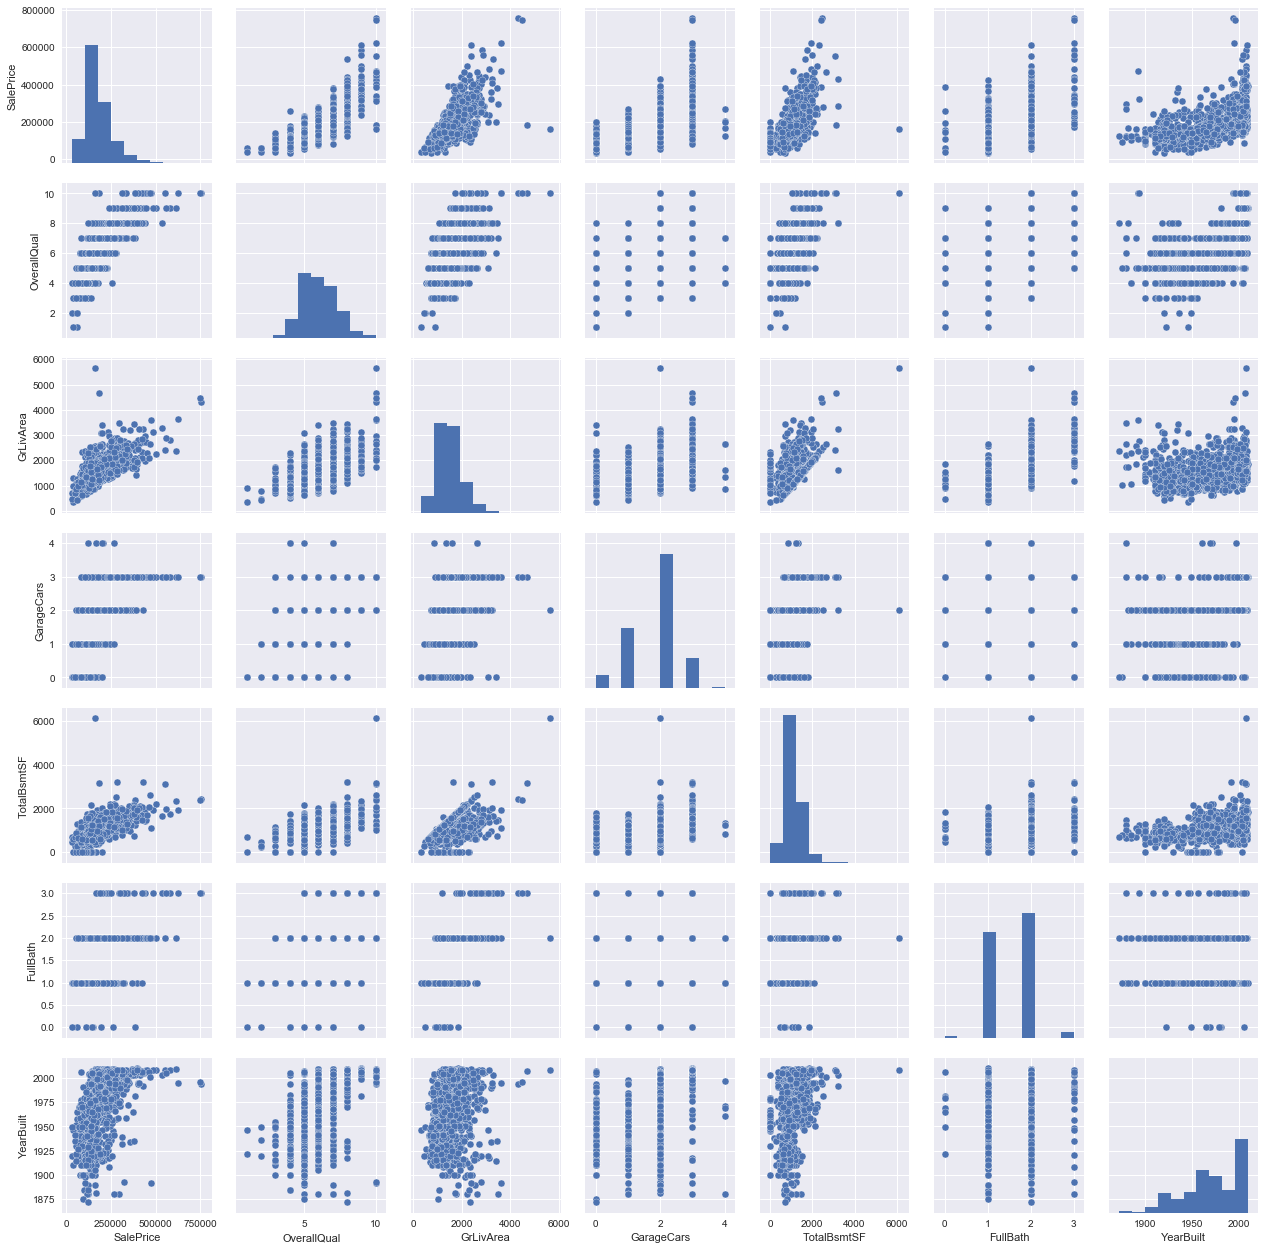

In [279]:
pcols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(trainds[pcols], size = 2.5)

In [246]:
pd.Series.notnull?